In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("delivery_time.csv")

In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [8]:
data[data.duplicated()].shape

(0, 2)

In [9]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [10]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [12]:
df = data.rename({'Delivery Time':'delivery','Sorting Time':'sorting'},axis = 1)

In [13]:
df.head()

,delivery,sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
df.shape

(21, 2)

<AxesSubplot:>

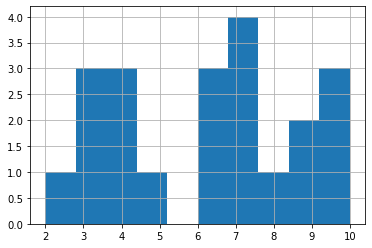

In [15]:
df['sorting'].hist()

<AxesSubplot:>

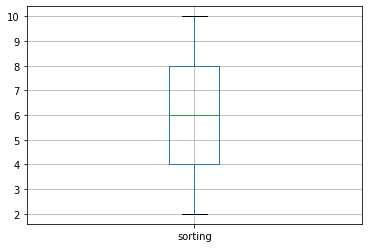

In [16]:
df.boxplot(column=['sorting'])

In [17]:
df.describe()


,delivery,sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:>

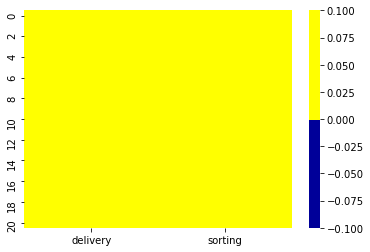

In [18]:
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(),cmap = sns.color_palette(colors))

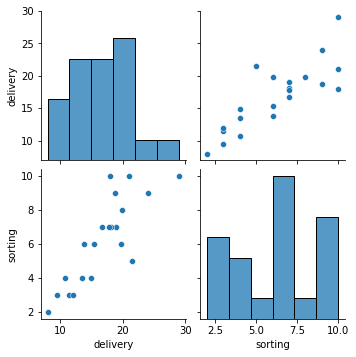

In [19]:
sns.pairplot(df)

K:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
K:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting', ylabel='Density'>

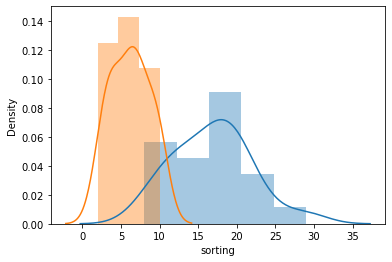

In [20]:
sns.distplot(df['delivery'])
sns.distplot(df['sorting'])

In [21]:
# model building

In [22]:
import statsmodels.formula.api as smf
model = smf.ols('delivery~sorting',data = df).fit()

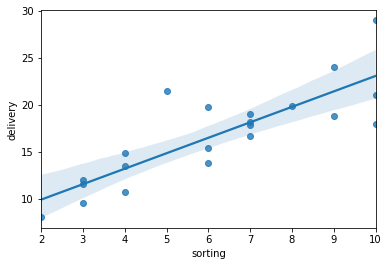

In [23]:
sns.regplot(x='sorting',y='delivery',data=df);

In [24]:
model.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [26]:
print(model.tvalues, '\n',model.pvalues)

Intercept    3.823349
sorting      6.387447
dtype: float64 
 Intercept    0.001147
sorting      0.000004
dtype: float64


In [27]:
# R squared values

In [28]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [29]:
# new value prediction

In [30]:
newdata=pd.Series([15,25])


In [31]:
data_pred = pd.DataFrame(newdata,columns=['sorting'])

In [32]:
data_pred

,sorting
0,15
1,25


In [33]:
model.predict(data_pred)

0    31.318032
1    47.808231
dtype: float64